In [49]:
from string import ascii_letters

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

H = 8
PALLETE = 'cool'

In [61]:
d = pd.read_excel("c:\dev\EnergyExplorer\data\energy.xlsx")
d = d.sort_values(by = "company")
d['full_name'] = d.company + " : " + d.name
normas = pd.read_excel("c:\dev\EnergyExplorer\data\energy.xlsx",'Sheet2')
source_cols = d.columns[10:20]
vitamin_cols = [f'{x}_in_can' for x in source_cols]
for (col, vcol) in zip(source_cols, vitamin_cols):
    d[vcol] = d[col] * d.voulume * 10

In [62]:
def display_vit(x):
    _,name,norma,units = get_normas(x[:-7])
    df = d[~d[x].isna()]
    g = sns.catplot(
        data=df, kind="bar",
        x="full_name", y=x,
        ci="sd", palette=PALLETE, alpha=.4, height=H, orient="v",)
    g.despine(left=False)
    g.set_axis_labels("Name")
    g.set_ylabels(f"{name}, {units}")
    g.set_xticklabels(rotation=45, horizontalalignment='right', label = 'label')
    g.map(plt.axhline, y=norma, c='red')
    ax1 = g.axes[0]
    g.fig.suptitle(f'{name}, содержание в банке, {units}')
    plt.show()

def get_normas(x):
    return normas[normas.vitamins==x].to_records(index=False)[0]


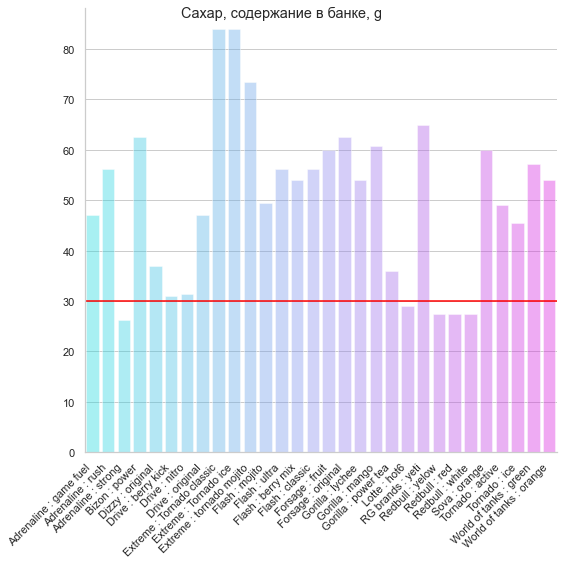

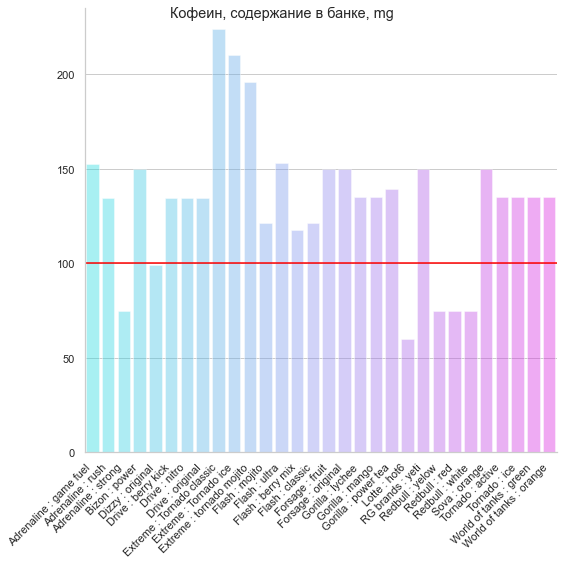

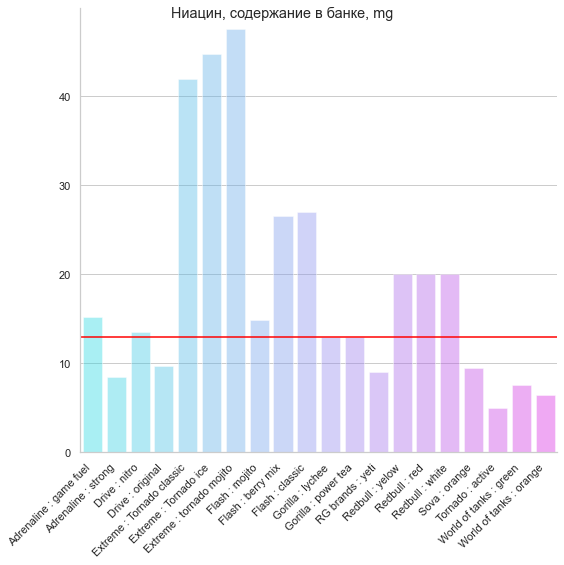

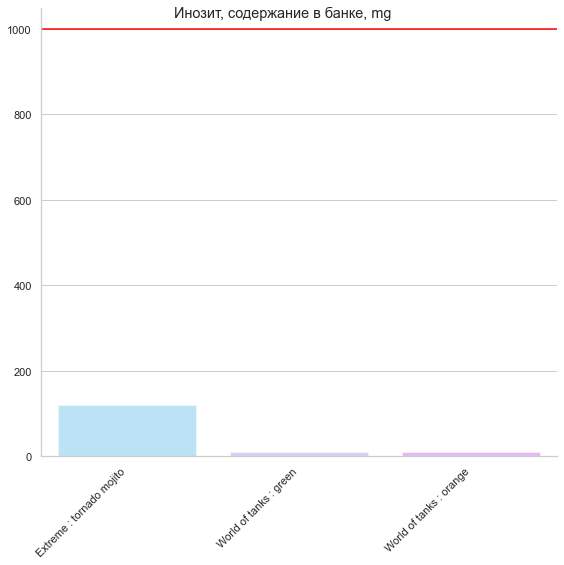

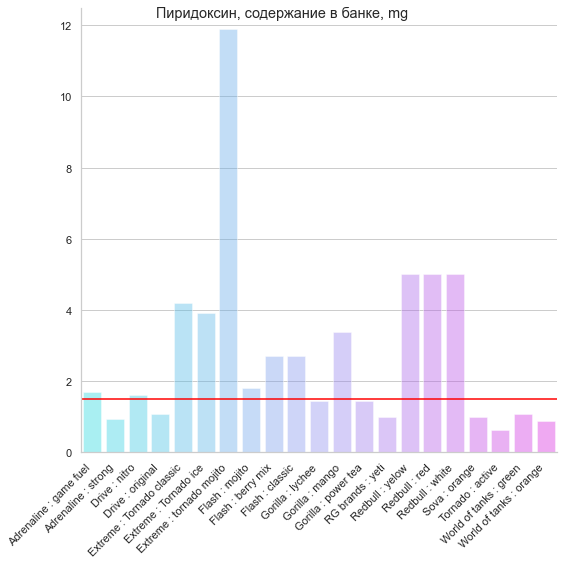

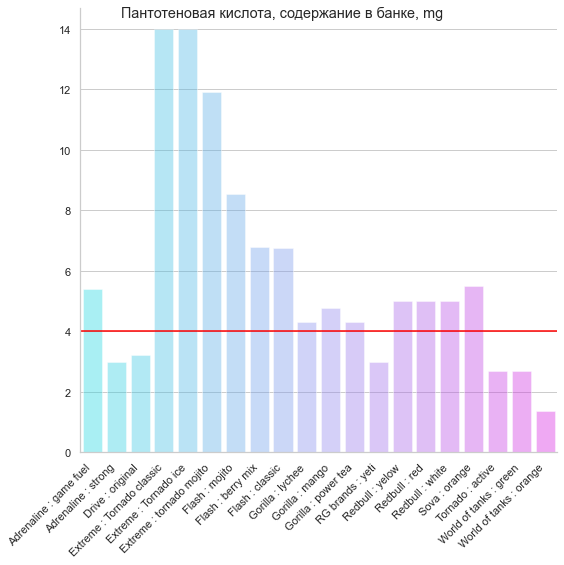

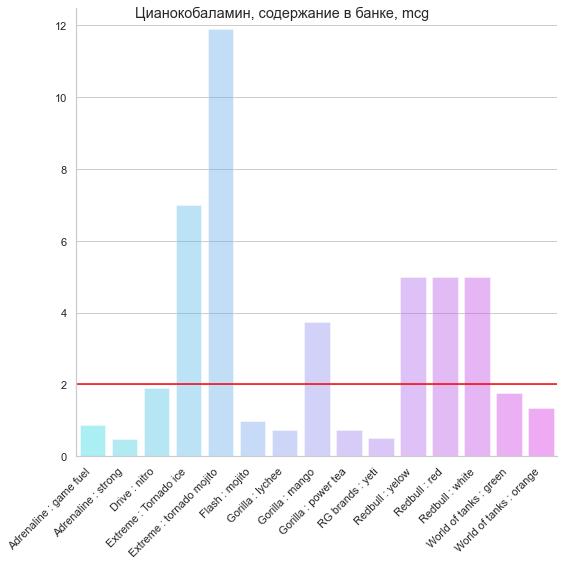

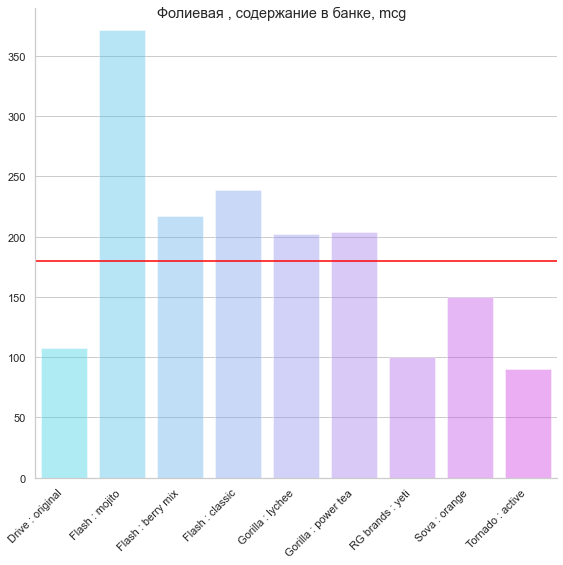

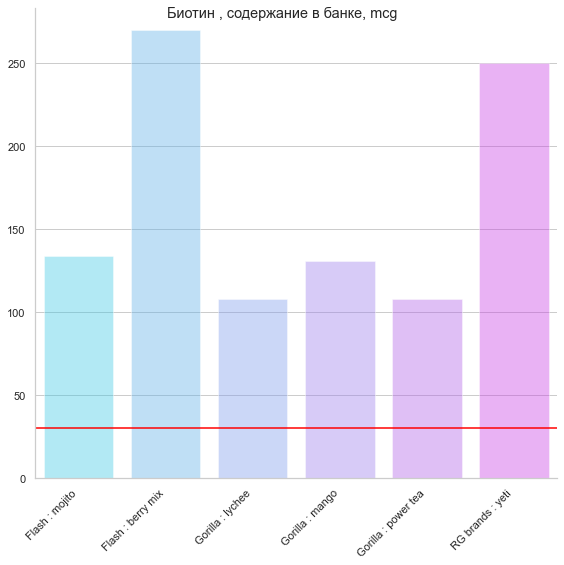

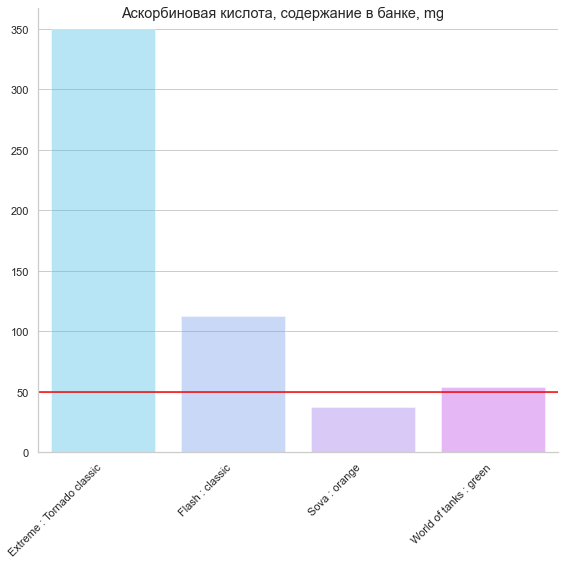

In [63]:

for col in vitamin_cols:
    display_vit(col)
    

In [58]:
vitamin_cols

['sugar_in_can',
 'caffeine_in_can',
 'b3_in_can',
 'b8_in_can',
 'b6_in_can',
 'b5_in_can',
 'b12_in_can',
 'b9_in_can',
 'b7_in_can',
 'c_in_can']

In [59]:
display_vit("caffeine_in_can")

ValueError: Could not interpret input 'full_name'

In [60]:
display_vit('sugar_in_can')

ValueError: Could not interpret input 'full_name'

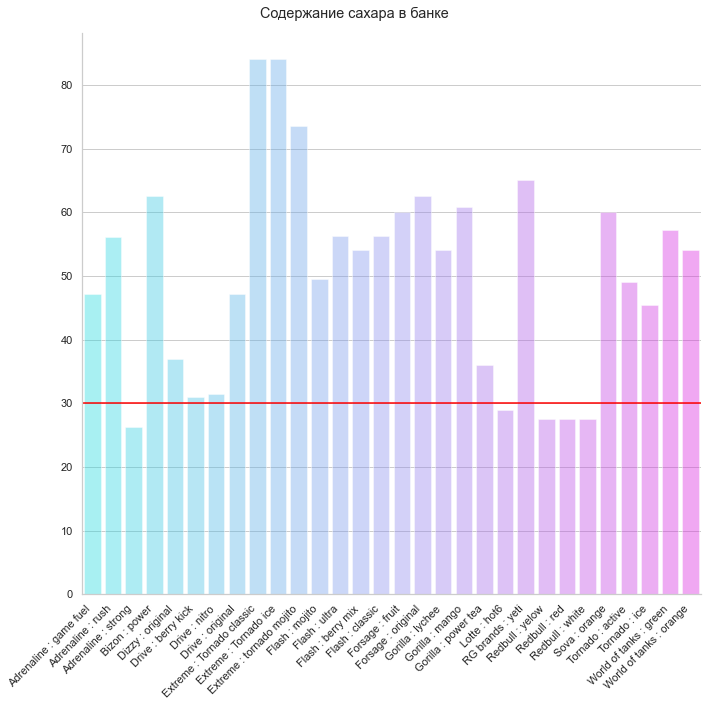

In [38]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=d, kind="bar",
    x="full_name", y="sugar_in_can",
    ci="sd", palette="cool", alpha=.4, height=10, orient="v",
)
g.despine(left=False)
g.set_axis_labels("Name")
g.set_ylabels("sugar in can(mg)")
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.fig.suptitle('Содержание сахара в банке')
g.map(plt.axhline, y=30, c='red')


<AxesSubplot:>

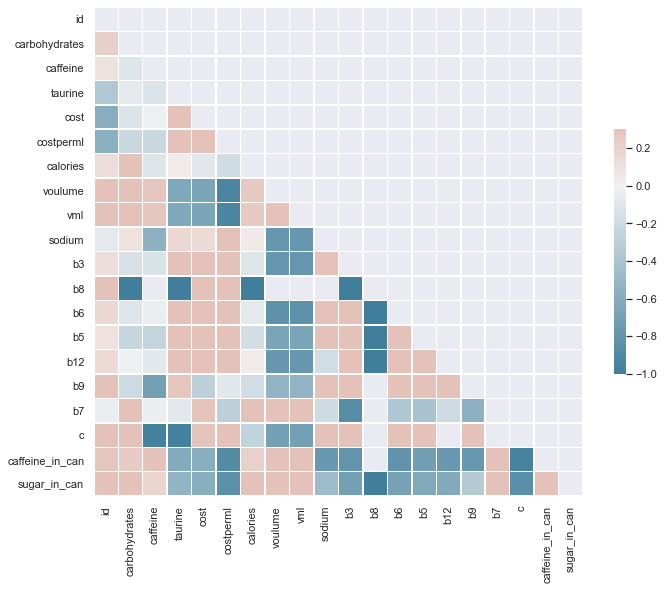

In [39]:
dcost = d[~d.cost.isna()]
sns.set_theme(style="dark")
# Compute the correlation matrix
corr = dcost.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
            


In [40]:
display_vit('sugar_in_can', "сахара")

TypeError: display_vit() takes 1 positional argument but 2 were given

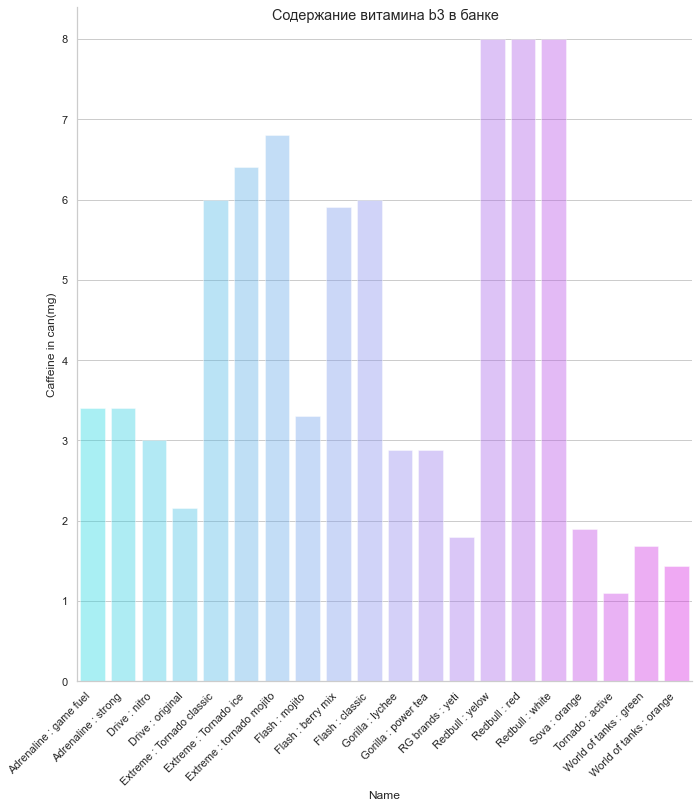

In [ ]:
display_vit('b3', 'витамина b3')


In [ ]:
cols = d.columns[3:]
dnum = d[cols]

sns.set_theme(style="dark")
# Compute the correlation matrix
corr = dnum.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
            